In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
movies=pd.read_csv('movies-Copy1.csv')
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [53]:
ratings=pd.read_csv('ratings-Copy1.csv')
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [54]:
len(movies), len(ratings)

(9742, 100836)

In [55]:
ratings.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

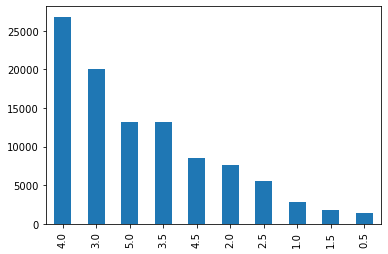

In [56]:
ratings.rating.value_counts().plot(kind='bar')
plt.show()

In [57]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [58]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [111]:
from surprise import Reader, Dataset

In [112]:
data = ratings[['userId', 'movieId', 'rating', 'timestamp']]
data = data.iloc[:, :-1]

In [113]:
data.head(3)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0


In [114]:
reader = Reader(rating_scale=(0, 9))
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

In [115]:
type(data)

surprise.dataset.DatasetAutoFolds

In [106]:
from sklearn.decomposition import NMF

In [107]:
from surprise import SVD, accuracy
# algo = SVD()
# algo.fit(trainset)

In [108]:
# predictions = algo.test(testset)
# #predictions

In [109]:
from surprise import accuracy
# accuracy.rmse(predictions)

RMSE: 0.8729


0.8728898307879099

In [110]:
from surprise import SVDpp, SlopeOne, NormalPredictor

In [95]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(),SlopeOne(), NMF()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.880695,3.672403,0.311329
SlopeOne,0.913201,3.610681,10.174738
NMF,0.934897,5.393295,0.283587


In [96]:
from surprise.model_selection import train_test_split

#trainset, testset = train_test_split(data, test_size=0.25)

In [121]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_epochs': [30,50], 'lr_all': [0.005, 0.010],
              'reg_all': [0,1,0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8717102450089987
{'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.2}


In [120]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 0.8670


0.8669942579783928

In [122]:
import pickle
import requests
import json

In [123]:
# Saving model to disk
pickle.dump(algo, open('model.pkl','wb'))